** ANTONIO MARTÍNEZ PAYÁ**

# Homework 7: Mixtures of Bernoulli distributions

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

In this homework you will implement the EM algorithm for mixtures of Bernoulli distributions. This model is also known as [*latent class analysis*](https://en.wikipedia.org/wiki/Latent_class_model). As well as being of practical importance on its own right, understading this model and its learning also lay the fundation for **hidden Markov models (HMMs)** over discrete variables. HMMs will be dicussed in future course sessions.



### Mixtures of Bernoulli distributions

Consider a set of i.i.d. $D$-dimensional binary (0-1) vectors. Examples of this kind of data are binary images, binary detection results, or genetic markers. Consider also a mixture of multinomials (or multivariate Bernoullis) model for each of the vectors, $\mathbf{x}$,

$$\displaystyle p(\mathbf{x} | \boldsymbol{\Theta},\mathbf{\pi} ) = \sum_{k=1}^K \pi_k p_k(\mathbf{x}^{(i)}|\boldsymbol{\theta}_k) = \sum_{k=1}^K \pi_k \prod_{j=1}^D \theta_{jk}^{x_{j}} (1-\theta_{jk})^{1-x_{j}},$$
where $\boldsymbol{\Theta}=[\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_K]$. If we are given a data set $\mathbf{X}=\{\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(N)}\}$ then the log likelihood function for this model is given by

\begin{align}
\log p(\mathbf{X}|\boldsymbol{\Theta},\mathbf{\pi}) = \sum_{i=1}^N \log\left(\sum_{k=1}^D \pi_k p(\mathbf{x}^{(i)}|\boldsymbol{\theta}_k)\right)
\end{align}

To prevent overfitting, we will also use a **prior distribution** for the model parameters. For $\boldsymbol{\Theta}$ we have

\begin{align}
\theta_{jk}&\sim\text{Beta}(\alpha,\beta)\\
p(\boldsymbol{\Theta}) &= \prod_{k=1}^{K} \prod_{j=1}^D p(\theta_{jk})\\
p(\theta_{jk}) &= \frac{\theta_{jk}^{\alpha-1}(1-\theta_{jk})^{\beta-1}}{\text{B}(\alpha,\beta)},
\end{align}
where $\text{B}(\alpha,\beta)$ is the [Beta function](https://en.wikipedia.org/wiki/Beta_function). Check [here](https://en.wikipedia.org/wiki/Beta_distribution) for more details about the Beta distribution.

For $\mathbf{\pi}$ we use a uniform [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution):
\begin{align}
\mathbf{\pi}&\sim \text{Dir}(\frac{1}{K}, \ldots, \frac{1}{K}) \Rightarrow p(\mathbf{\pi}) =\frac{1}{\text{B}(\frac{1}{K}, \ldots, \frac{1}{K})}\prod_{k=1}^{K}\pi_k^{\frac{1}{K}-1},
\end{align}
where $\text{B}(\frac{1}{K}, \ldots, \frac{1}{K})$ is the multivariate Beta function.


### EM learning

We now derive the EM algorithm for maximizing the posterior distribution $p(\mathbf{\Theta},\mathbf{\pi}|\mathbf{X})$. To do this, we introduce an explict discrete latent variable $z\in\{1,\ldots,K\}$ assoacted to each data point $\mathbf{x}$:
\begin{align}
p(\mathbf{x},z) = \prod_{k=1}^{K} \left(\pi_k ~p_{k}(\mathbf{x})\right)^{\mathbb{1} [z==k]}, ~~ p(z)=\prod_{k=1}^K \pi_k^{\mathbb{1} [z==k]}
\end{align}

#### Complete log-likelihood

We write the complete data log-likelihood as follows:
\begin{align}
\log p(\mathbf{X},\mathbf{z}|\boldsymbol{\Theta},\mathbf{\pi})=\sum_{i=1}^{N}\sum_{k=1}^{K}\mathbb{1} [z^{(i)}==k]\left(\log \pi_k + \sum_{j=1}^D \left[x_{j}^{(i)}\log\theta_k+(1-x_{j}^{(i)})\log(1-\theta_k)\right]\right)
\end{align}

#### Posterior distribution of $\mathbf{z}$ given $\boldsymbol{\Theta},\mathbf{\pi}$

In the $E$, we compute the expected complete data log-likelihood w.r.t. posterior distribution of $\mathbf{z}$ given the current values of $\boldsymbol{\Theta},\mathbf{\pi}$:
\begin{align}
p(z^{(i)}=k|\mathbf{x}^{(i)},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)}) \triangleq r_{ik} = \frac{\pi_{(k,t-1)} p_k(\mathbf{x}|\boldsymbol{\theta}_k) }{\sum_{q=1}^K \pi_{(q,t-1)} p_k(\mathbf{x}^{(i)}|\boldsymbol{\theta}_q)}, ~~~ k=1,\ldots, K
\end{align}

#### E-step
It is easy to show that
\begin{align}
\mathcal{Q}(\boldsymbol{\Theta},\mathbf{\pi},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})&=\mathbb{E}_{p(\mathbf{z}|\mathbf{X}^{(i)},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})}[\log p(\mathbf{X},\mathbf{z}|\boldsymbol{\Theta},\mathbf{\pi})]\\
&=\sum_{i=1}^{N}\sum_{k=1}^K r_{ik} \left(\log \pi_k + \sum_{j=1}^D \left[x_{j}^{(i)}\log\theta_k+(1-x_{j}^{(i)})\log(1-\theta_k)\right]\right)
\end{align}

#### M-step

We have to find
\begin{align}
\boldsymbol{\Theta}_t,\mathbf{\pi}_t = \arg \max_{\boldsymbol{\Theta},\mathbf{\pi}} ~~\mathcal{Q}(\boldsymbol{\Theta},\mathbf{\pi},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})+ \log p(\boldsymbol{\Theta})+\log p(\mathbf{\pi})
\end{align}

As a result, one can prove that the maximum is attained at

\begin{align}
r_k &\triangleq \sum_{i=1}^N r_{ik} \\\\
\pi^t_k &= \frac{r_k+\frac{1}{K}-1}{N+1-K}\\\\
\boldsymbol{\theta}_k &= \frac{\sum_{i=1}^N r_{ik}\mathbf{x}^{(i)}+\alpha-1}{r_k+\alpha+\beta-2} 
\end{align}

To see details about the derivation of this result, check out chapter 9 of Bishop's book. Also Chapter 11 of Murphy's book.

## Implementation of the E-step

Wryte a Python function that evaluates the responsibilities $r_{ik}$, $i=1,\ldots,N$, $k=1,\ldots,K$ for each data point. It should take as input the current values of $\boldsymbol{\pi}$, $\boldsymbol{\Theta}$, and the matrix $\mathbf{X}$ of observations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal as mvn
from scipy.stats import bernoulli
from functools import reduce
import multiprocessing
from operator import mul

%matplotlib inline

In [2]:
# COMPLETE THE FOLLOWING FUNCTION, which takes the whole matrix of data points and the vector 
# of probabilites of a single cluster. The function must return the probability of each data 
# point given cluster parameters p(x|theta_k)
    

def eval_bern_pdf(X,Thetak): 
    P = np.prod(bernoulli.pmf(X, Thetak),axis=1)
    return P


# COMPLETE THE FOLLOWING FUNCTION, which takes the whole matrix of data points, the vector 
# of probabilites of a single cluster and the cluster probabilites. The function must return 
# the matrix of responsibilites

def responsibilities(X,P,Theta,K):
    N,D = X.shape
    R = np.zeros([N,K])
    denom_accum = np.zeros(N)
    
    for k in range(K):
        
        vector_prob = P[k] * eval_bern_pdf(X,Theta[k])
        denom_accum += vector_prob
        R[:,k] = vector_prob.T
        
          
    
    return R/denom_accum.reshape(-1,1)
        

In [3]:
#Test your code with the following example

N = 2
D = 5
K = 3

np.random.seed(10)

X = np.random.randint(0,2,[N,D])

# X should be equal to (we have fixed the seed) 
# [[1 1 0 1 0]
#  [1 1 0 1 1]]

print(X)
Theta = np.random.rand(K,D)
P = np.random.rand(K,1)
P /= np.sum(P)

R = responsibilities(X,P,Theta,K)
print(R)

# R should be a [N,K] matrix with the following values
# [[  2.20811374e-02   2.19873976e-01   7.58044887e-01]
#  [  7.49839314e-04   3.34167429e-01   6.65082732e-01]]


[[1 1 0 1 0]
 [1 1 0 1 1]]
[[  2.20811374e-02   2.19873976e-01   7.58044887e-01]
 [  7.49839314e-04   3.34167429e-01   6.65082732e-01]]


## Implementation of the M step

In [4]:
# COMPLETE THE FOLLOWING FUNCTION, which computes the the soft number of points 
# associated to each cluster given the matrix R

def points_cluster(R):
    Rk = np.sum(R, axis=0)
    return Rk

# COMPLETE THE FOLLOWING FUNCTION, which updates the value of the cluster probabilites

def new_P(R,N):
    
    P = (points_cluster(R)+(1.0/R.shape[1])-1)/(N+1.0-R.shape[1])
    return P

def new_Theta(R,X,K,alpha,beta):
    
    Theta = np.zeros([K,D])
    Rk = points_cluster(R)
    cons1 = alpha - 1.0
    cons2 = alpha + beta - 2.0
    
    for k in range(K):
        numerator = R[:,k].reshape(-1,1)*X
        numerator = np.sum(numerator, axis=0) + cons1
        denominator = Rk[k]+cons2
        Theta[k,:] = numerator/denominator
    
    return Theta


In [5]:
alpha = 2.
beta = 2.

Theta = new_Theta(R,X,K,alpha,beta)

print(Theta)

# Theta should be a [K,D] matrix with the following values
# [[ 0.50564332  0.50564332  0.49435668  0.50564332  0.49472737]
# [ 0.60846367  0.60846367  0.39153633  0.60846367  0.52237502]
#  [ 0.70786949  0.70786949  0.29213051  0.70786949  0.48642146]]



[[ 0.50564332  0.50564332  0.49435668  0.50564332  0.49472737]
 [ 0.60846367  0.60846367  0.39153633  0.60846367  0.52237502]
 [ 0.70786949  0.70786949  0.29213051  0.70786949  0.48642146]]


## Computing the log-likelihood

In [6]:
# COMPLETE THE FOLLOWING FUNCTION, which computes the model log-likelihood 
# given the model parameters

def log_lik(X,P,Theta,K):
    
    LL = np.zeros(X.shape[0])
    
    
    for k in range(K):
        LL += P[k]*eval_bern_pdf(X,Theta[k,:])
        
    return np.sum(np.log(LL)) 


In [7]:
#For the toy example the LL should be -5.31111037373

print(log_lik(X,P,Theta,K))

-5.31111037373


## EM for a synthetic dataset

Let's generate samples from a mixtures of Bernoulli distributions and run the EM algorithm to recover the true model parameters.

In [8]:
## True model parameters
K = 5
D = 100
N = 5000
X = []


Theta_true = np.random.rand(K,D)
P_true = np.random.rand(K,1)
P_true /= np.sum(P_true)

N_Z_true = np.random.multinomial(N,P_true.reshape([-1,]))

for k in range(K):
    X.append(np.random.rand(N_Z_true[k],D)<=Theta_true[k,:])
    print(X[k].shape)

X = np.concatenate(X)

(443L, 100L)
(1445L, 100L)
(973L, 100L)
(1135L, 100L)
(1004L, 100L)


In [9]:
## EM initialization
K = 5

P = np.ones([K,1])*1.0/K
P /= np.sum(P_true)

# Uniform initializaiton for Theta in the range [0.2,0.8]
Theta = np.random.uniform(0.2,0.8, size=(K,D))

Num_Iter = 100

alpha = 0.2
beta = 0.2

LL = np.zeros([Num_Iter,1])

for i in range(Num_Iter):
    R = responsibilities(X,P,Theta,K)
    P = new_P(R,N)
    Theta = new_Theta(R,X,K,alpha,beta)
    LL[i] = log_lik(X,P,Theta,K)
    

    

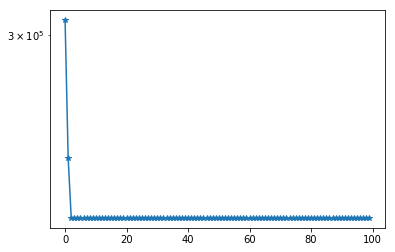

In [10]:
# Plot the evolution of the negative LL. It should always decrease!

plt.semilogy(-LL,'-*')  

We can observe that with much less iterations we would obtain the same value for the log likelihood function.

Text(0.5,1,u'Cluster Probabilites')

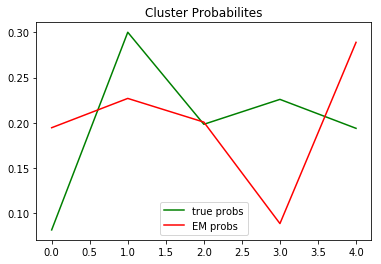

In [11]:
plt.plot(P_true,label='true probs', color = [0, 0.5, 0])
plt.plot(P,label='EM probs', color = [1, 0, 0])
plt.legend()
plt.title('Cluster Probabilites')

By sorting, it is easy to note that we obtain the same $\pi_k$ probabilities we have generated the data with.

## EM for a data set of handwritten digits

Load and run the EM over the [sklearn dataset of digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits). Each datapoint is a 8x8 image of a digit.

(1797L, 64L)


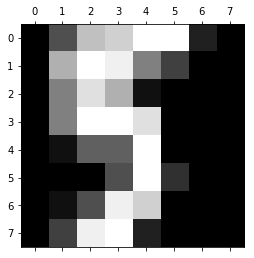

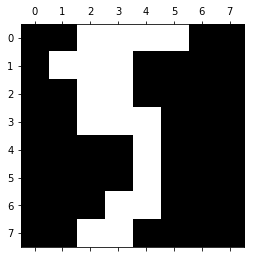

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()    #Gray scale, we have to binarize
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[15]) 
plt.show()

#Binarization

Bin_Images = np.copy(digits.images)

val_min=np.min(Bin_Images)
val_max=np.max(Bin_Images)

Bin_Images = (Bin_Images - val_min) / (val_max - val_min)

Bin_Images = np.round(Bin_Images)

plt.gray() 
plt.matshow(Bin_Images[15]) 
plt.show()


('Iteration: ', 0)
('Iteration: ', 1)
('Iteration: ', 2)
('Iteration: ', 3)
('Iteration: ', 4)
('Iteration: ', 5)
('Iteration: ', 6)
('Iteration: ', 7)
('Iteration: ', 8)
('Iteration: ', 9)
('Iteration: ', 10)
('Iteration: ', 11)
('Iteration: ', 12)
('Iteration: ', 13)
('Iteration: ', 14)
('Iteration: ', 15)
('Iteration: ', 16)
('Iteration: ', 17)
('Iteration: ', 18)
('Iteration: ', 19)
('Iteration: ', 20)
('Iteration: ', 21)
('Iteration: ', 22)
('Iteration: ', 23)
('Iteration: ', 24)
('Iteration: ', 25)
('Iteration: ', 26)
('Iteration: ', 27)
('Iteration: ', 28)
('Iteration: ', 29)
('Iteration: ', 30)
('Iteration: ', 31)
('Iteration: ', 32)
('Iteration: ', 33)
('Iteration: ', 34)
('Iteration: ', 35)
('Iteration: ', 36)
('Iteration: ', 37)
('Iteration: ', 38)
('Iteration: ', 39)
('Iteration: ', 40)
('Iteration: ', 41)
('Iteration: ', 42)
('Iteration: ', 43)
('Iteration: ', 44)
('Iteration: ', 45)
('Iteration: ', 46)
('Iteration: ', 47)
('Iteration: ', 48)
('Iteration: ', 49)
('Iteratio

('Iteration: ', 396)
('Iteration: ', 397)
('Iteration: ', 398)
('Iteration: ', 399)
('Iteration: ', 400)
('Iteration: ', 401)
('Iteration: ', 402)
('Iteration: ', 403)
('Iteration: ', 404)
('Iteration: ', 405)
('Iteration: ', 406)
('Iteration: ', 407)
('Iteration: ', 408)
('Iteration: ', 409)
('Iteration: ', 410)
('Iteration: ', 411)
('Iteration: ', 412)
('Iteration: ', 413)
('Iteration: ', 414)
('Iteration: ', 415)
('Iteration: ', 416)
('Iteration: ', 417)
('Iteration: ', 418)
('Iteration: ', 419)
('Iteration: ', 420)
('Iteration: ', 421)
('Iteration: ', 422)
('Iteration: ', 423)
('Iteration: ', 424)
('Iteration: ', 425)
('Iteration: ', 426)
('Iteration: ', 427)
('Iteration: ', 428)
('Iteration: ', 429)
('Iteration: ', 430)
('Iteration: ', 431)
('Iteration: ', 432)
('Iteration: ', 433)
('Iteration: ', 434)
('Iteration: ', 435)
('Iteration: ', 436)
('Iteration: ', 437)
('Iteration: ', 438)
('Iteration: ', 439)
('Iteration: ', 440)
('Iteration: ', 441)
('Iteration: ', 442)
('Iteration: 

('Iteration: ', 787)
('Iteration: ', 788)
('Iteration: ', 789)
('Iteration: ', 790)
('Iteration: ', 791)
('Iteration: ', 792)
('Iteration: ', 793)
('Iteration: ', 794)
('Iteration: ', 795)
('Iteration: ', 796)
('Iteration: ', 797)
('Iteration: ', 798)
('Iteration: ', 799)
('Iteration: ', 800)
('Iteration: ', 801)
('Iteration: ', 802)
('Iteration: ', 803)
('Iteration: ', 804)
('Iteration: ', 805)
('Iteration: ', 806)
('Iteration: ', 807)
('Iteration: ', 808)
('Iteration: ', 809)
('Iteration: ', 810)
('Iteration: ', 811)
('Iteration: ', 812)
('Iteration: ', 813)
('Iteration: ', 814)
('Iteration: ', 815)
('Iteration: ', 816)
('Iteration: ', 817)
('Iteration: ', 818)
('Iteration: ', 819)
('Iteration: ', 820)
('Iteration: ', 821)
('Iteration: ', 822)
('Iteration: ', 823)
('Iteration: ', 824)
('Iteration: ', 825)
('Iteration: ', 826)
('Iteration: ', 827)
('Iteration: ', 828)
('Iteration: ', 829)
('Iteration: ', 830)
('Iteration: ', 831)
('Iteration: ', 832)
('Iteration: ', 833)
('Iteration: 

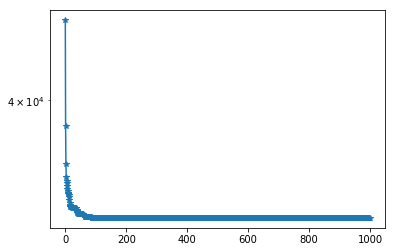

In [13]:
# EM 

K = 10
D = 64
X = Bin_Images.reshape([-1,D])

P = np.ones([K,1])*1.0/K
P /= np.sum(P_true)

# Uniform initializaiton for Theta in the range [0.2,0.8]
Theta = np.random.uniform(0.2,0.8, size=(K,D))

Num_Iter = 1000

alpha = 2.
beta = 2.

LL = np.zeros([Num_Iter,1])

for i in range(Num_Iter):
    print("Iteration: ",i)
    R = responsibilities(X,P,Theta,K)
    P = new_P(R,N)
    Theta = new_Theta(R,X,K,alpha,beta)
    LL[i] = log_lik(X,P,Theta,K)
    

# Plot the evolution of the negative LL. It should always decrease!
plt.semilogy(-LL,'-*')  


Again, with much less iterations we would obtain the same value for the log likelihood function.

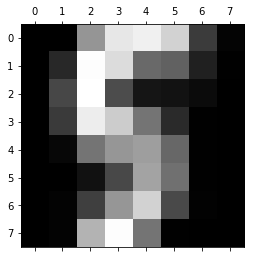

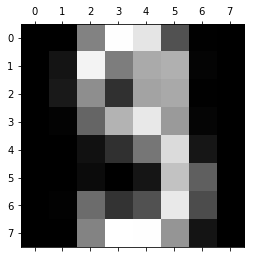

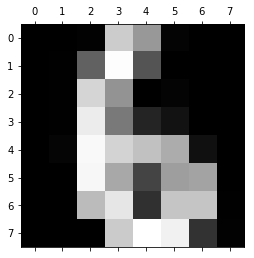

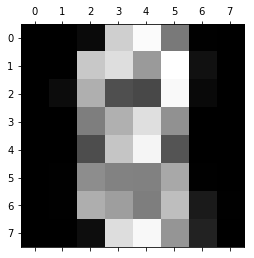

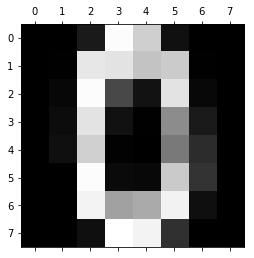

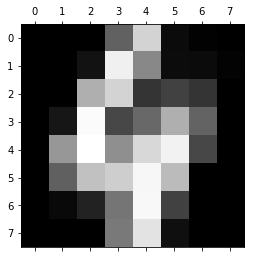

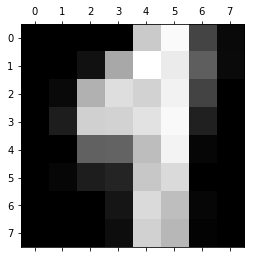

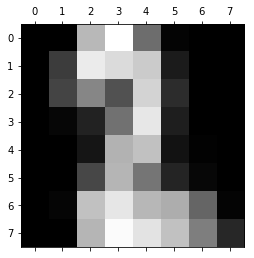

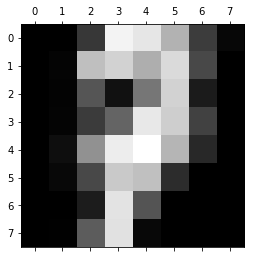

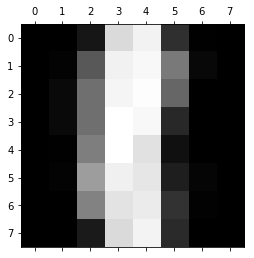

In [55]:
# Plot as a 8x8 gray-scale image each theta_k vector
# (it represents the probability of each pixel to take value 1)


for k in range(K):
    plt.gray() 
    plt.matshow(Theta[k,:].reshape([8,8])) 
    plt.show()

We are plotting each $\theta_k$ (49 probilities), so that we are able to see the different probabilities of the pixel being 1 or 0 in each of the obtained clusters. We can observe that the algorithm is able to clusterize quite good some of the numbers.

## EM for the MNIST Database (optional)

Repeat the experiment for the MNIST Database. Take $10^4$ images **at random**, and binarize the database.


In [56]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

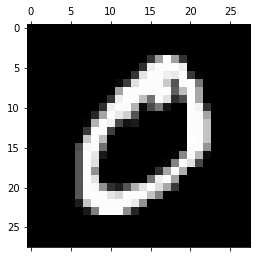

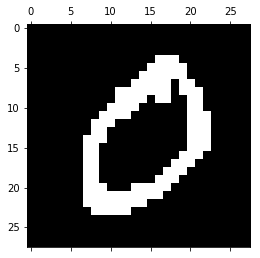

In [57]:
images = mnist.data  #70000 images


plt.gray() 
plt.matshow(images[0,:].reshape([28,28])) 
plt.show()

val_min=np.min(images)
val_max=np.max(images)

Bin_Images = (images - val_min) / (val_max - val_min)

Bin_Images = np.round(Bin_Images)

plt.gray() 
plt.matshow(Bin_Images[0,:].reshape([28,28])) 
plt.show()

mask = np.random.permutation(Bin_Images.shape[0])

Bin_Images = Bin_Images[mask,:]

In [58]:
# EM 

K = 10
D = 784
N = 1000

X = Bin_Images[:N,:]

P = np.ones([K,1])*1.0/K
P /= np.sum(P_true)

# Uniform initializaiton for Theta in the range [0.2,0.8]
Theta = np.random.uniform(0.2,0.8, size=(K,D))

Num_Iter = 1000

alpha = 2.
beta = 2.

LL = np.zeros([Num_Iter,1])

for i in range(Num_Iter):
    print("Iteration: ",i)
    R = responsibilities(X,P,Theta,K)
    P = new_P(R,N)
    Theta = new_Theta(R,X,K,alpha,beta)
    LL[i] = log_lik(X,P,Theta,K)
    

Iterations:  0
Iterations:  1
Iterations:  2
Iterations:  3
Iterations:  4
Iterations:  5
Iterations:  6
Iterations:  7
Iterations:  8
Iterations:  9
Iterations:  10
Iterations:  11
Iterations:  12
Iterations:  13
Iterations:  14
Iterations:  15
Iterations:  16
Iterations:  17
Iterations:  18
Iterations:  19
Iterations:  20
Iterations:  21
Iterations:  22
Iterations:  23
Iterations:  24
Iterations:  25
Iterations:  26
Iterations:  27
Iterations:  28
Iterations:  29
Iterations:  30
Iterations:  31
Iterations:  32
Iterations:  33
Iterations:  34
Iterations:  35
Iterations:  36
Iterations:  37
Iterations:  38
Iterations:  39
Iterations:  40
Iterations:  41
Iterations:  42
Iterations:  43
Iterations:  44
Iterations:  45
Iterations:  46
Iterations:  47
Iterations:  48
Iterations:  49
Iterations:  50
Iterations:  51
Iterations:  52
Iterations:  53
Iterations:  54
Iterations:  55
Iterations:  56
Iterations:  57
Iterations:  58
Iterations:  59
Iterations:  60
Iterations:  61
Iterations:  62
It

Iterations:  489
Iterations:  490
Iterations:  491
Iterations:  492
Iterations:  493
Iterations:  494
Iterations:  495
Iterations:  496
Iterations:  497
Iterations:  498
Iterations:  499
Iterations:  500
Iterations:  501
Iterations:  502
Iterations:  503
Iterations:  504
Iterations:  505
Iterations:  506
Iterations:  507
Iterations:  508
Iterations:  509
Iterations:  510
Iterations:  511
Iterations:  512
Iterations:  513
Iterations:  514
Iterations:  515
Iterations:  516
Iterations:  517
Iterations:  518
Iterations:  519
Iterations:  520
Iterations:  521
Iterations:  522
Iterations:  523
Iterations:  524
Iterations:  525
Iterations:  526
Iterations:  527
Iterations:  528
Iterations:  529
Iterations:  530
Iterations:  531
Iterations:  532
Iterations:  533
Iterations:  534
Iterations:  535
Iterations:  536
Iterations:  537
Iterations:  538
Iterations:  539
Iterations:  540
Iterations:  541
Iterations:  542
Iterations:  543
Iterations:  544
Iterations:  545
Iterations:  546
Iterations:  5

Iterations:  971
Iterations:  972
Iterations:  973
Iterations:  974
Iterations:  975
Iterations:  976
Iterations:  977
Iterations:  978
Iterations:  979
Iterations:  980
Iterations:  981
Iterations:  982
Iterations:  983
Iterations:  984
Iterations:  985
Iterations:  986
Iterations:  987
Iterations:  988
Iterations:  989
Iterations:  990
Iterations:  991
Iterations:  992
Iterations:  993
Iterations:  994
Iterations:  995
Iterations:  996
Iterations:  997
Iterations:  998
Iterations:  999


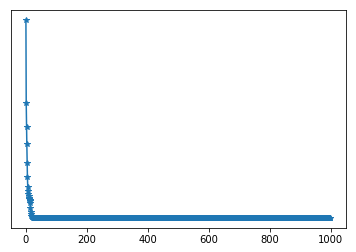

In [59]:
# Plot the evolution of the negative LL. It should always decrease!
plt.semilogy(-LL,'-*')  

Again, with much less iterations we would obtain the same value for the log likelihood function.

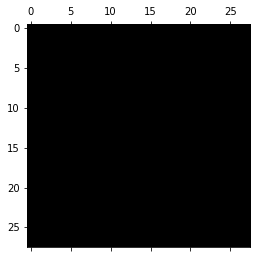

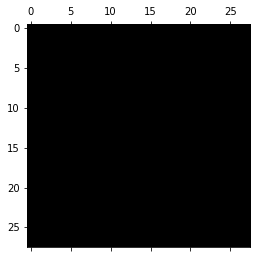

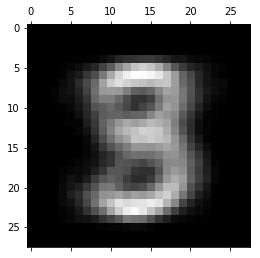

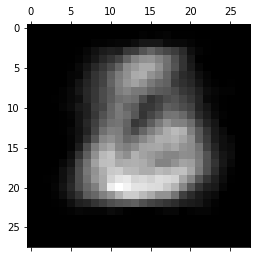

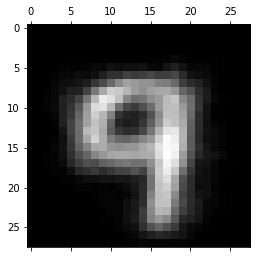

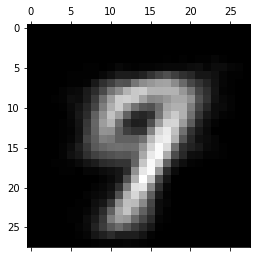

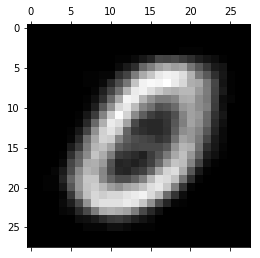

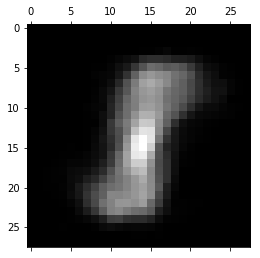

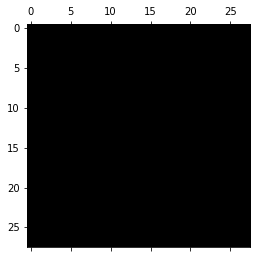

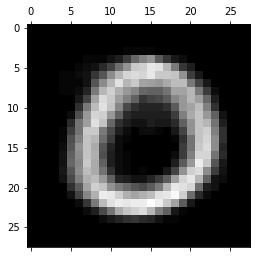

In [60]:
# Plot as a 8x8 gray-scale image each theta_k vector
# (it represents the probability of each pixel to take value 1)


for k in range(K):
    plt.gray() 
    plt.matshow(Theta[k,:].reshape([28,28])) 
    plt.show()

We are plotting each $\theta_k$ (49 probilities), so that we are able to see the different probabilities of the pixel being 1 or 0 in each of the obtained clusters. We can observe that the algorithm is able to clusterize quite good some of the numbers.